# Dry Beans Classification

In [13]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [14]:
!pip install featurewiz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
# for basic mathematics operation 
import numpy as np
import pandas as pd
from pandas import plotting
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score 
from featurewiz import featurewiz
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler,LabelEncoder
from collections import Counter
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
import xgboost as xgb

# for visualizations
# import mlxtend
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from sklearn.metrics import ConfusionMatrixDisplay
# from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt


# for path
import os

In [16]:
df = pd.read_csv('/content/train.csv')
print("The shape of the dataset is {}.\n\n".format(df.shape))

The shape of the dataset is (10834, 18).




In [17]:
df.head(5)

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10834 non-null  int64  
 1   Area             10834 non-null  int64  
 2   Perimeter        10834 non-null  float64
 3   MajorAxisLength  10834 non-null  float64
 4   MinorAxisLength  10834 non-null  float64
 5   AspectRation     10834 non-null  float64
 6   Eccentricity     10834 non-null  float64
 7   ConvexArea       10834 non-null  int64  
 8   EquivDiameter    10834 non-null  float64
 9   Extent           10834 non-null  float64
 10  Solidity         10834 non-null  float64
 11  roundness        10834 non-null  float64
 12  Compactness      10834 non-null  float64
 13  ShapeFactor1     10834 non-null  float64
 14  ShapeFactor2     10834 non-null  float64
 15  ShapeFactor3     10834 non-null  float64
 16  ShapeFactor4     10834 non-null  float64
 17  y           

In [19]:
df_copy = df.copy()

In [20]:
df_copy['y'].value_counts()


DERMASON    2837
SIRA        2109
SEKER       1621
HOROZ       1488
CALI        1304
BARBUNYA    1057
BOMBAY       418
Name: y, dtype: int64

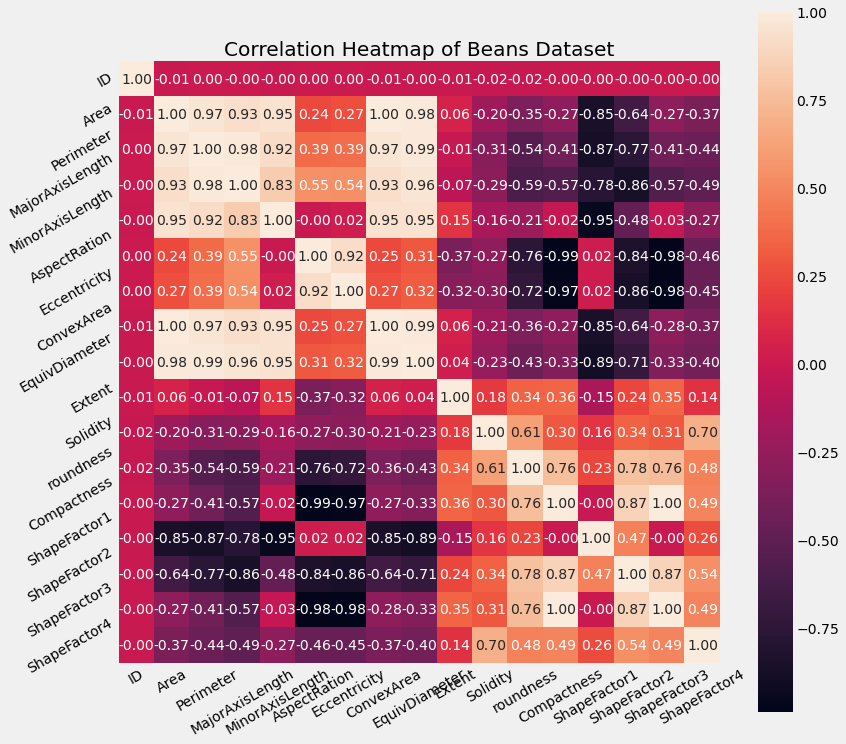

In [21]:
corr_matrix = df_copy.corr()

plt.figure(figsize=(12,12))
plt.title('Correlation Heatmap of Beans Dataset')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

In [22]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_copy['y']= label_encoder.fit_transform(df_copy['y'])
df_copy['y'].unique()


array([4, 5, 3, 6, 0, 2, 1])

In [23]:
x = df_copy.drop(['ID','y'],axis=1)
y = df_copy['y']
print(x)
print(y)

        Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      58238    971.303       397.202654       186.945510      2.124697   
1      44515    757.601       265.590470       213.967453      1.241266   
2      31662    653.783       239.902428       168.421505      1.424417   
3      38778    734.020       268.446281       184.061923      1.458456   
4      42530    775.403       281.212824       193.236878      1.455275   
...      ...        ...              ...              ...           ...   
10829  37777    716.007       250.174662       192.704033      1.298233   
10830  32187    667.621       247.778775       165.786862      1.494562   
10831  81837   1095.937       433.838186       241.527026      1.796230   
10832  48212    826.362       309.639462       199.285811      1.553746   
10833  28026    610.943       215.446569       165.740377      1.299904   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.88231

In [25]:
# from sklearn.linear_model import Lasso
# features = df_copy.drop('y' , axis=1).columns
# lasso = Lasso(alpha=0.02)
# lasso_coef = lasso.fit(x,y).coef_
# _ = plt.plot(range(len(features)), lasso_coef)
# _ = plt.xticks(range(len(features)), features, rotation=90)
# _ = plt.ylabel('Coefficients')
# plt.show()

In [26]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
ID,10834.0,5416.500000,3127.650742,0.000000,2708.250000,5416.500000,8124.750000,10833.000000
Area,10834.0,53095.675189,29542.542580,20420.000000,36343.500000,44645.000000,61295.000000,254616.000000
Perimeter,10834.0,855.274892,214.991122,524.932000,703.601250,793.739500,975.517500,1985.370000
MajorAxisLength,10834.0,320.036169,85.961630,183.601165,253.501071,296.377365,376.068399,738.860153
MinorAxisLength,10834.0,202.410342,45.113965,129.576207,175.927024,192.525040,217.315195,450.926187
AspectRation,10834.0,1.581294,0.244314,1.024868,1.432985,1.550761,1.703029,2.388873
Eccentricity,10834.0,0.750588,0.091481,0.218951,0.716250,0.764314,0.809450,0.908167
ConvexArea,10834.0,53816.205926,29999.710739,20684.000000,36731.250000,45148.000000,62251.500000,263261.000000
EquivDiameter,10834.0,253.123583,59.433080,161.243764,215.113880,238.419335,279.362162,569.374358
Extent,10834.0,0.749937,0.048949,0.555315,0.718778,0.760141,0.786871,0.866195


In [27]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler ,Normalizer
scaler = RobustScaler()
df_scaled = scaler.fit_transform(df_copy.drop(columns = ['ID','y']))
df_scaled = pd.DataFrame(df_scaled , columns= df_copy.columns.difference(['ID','y']))
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,10834.0,0.338684,1.183999,-0.970884,-0.332705,0.000000e+00,0.667295,8.415165
AspectRation,10834.0,0.226303,0.790652,-0.988567,-0.331493,0.000000e+00,0.668507,4.382344
Compactness,10834.0,0.193027,0.701342,-0.920116,-0.349818,-2.318871e-16,0.650182,3.610120
ConvexArea,10834.0,0.238844,1.090021,-1.520938,-0.401033,-3.433601e-16,0.598967,6.243358
Eccentricity,10834.0,0.113068,0.904716,-1.947432,-0.436134,0.000000e+00,0.563866,3.103611
EquivDiameter,10834.0,-0.147274,0.981558,-5.851517,-0.515704,0.000000e+00,0.484296,1.543493
Extent,10834.0,0.339660,1.175526,-0.958611,-0.329807,0.000000e+00,0.670193,8.546664
MajorAxisLength,10834.0,0.228866,0.925053,-1.201208,-0.362741,-2.211772e-16,0.637259,5.151189
MinorAxisLength,10834.0,-0.149849,0.718846,-3.008027,-0.607442,0.000000e+00,0.392558,1.557481
Perimeter,10834.0,-0.259568,1.054390,-15.736494,-0.607117,0.000000e+00,0.392883,1.455721


In [28]:
df_scaled= pd.concat([df_scaled, df.loc[:,['y']]], axis=1)
df_scaled.head(2)

,Area,AspectRation,Compactness,ConvexArea,Eccentricity,EquivDiameter,Extent,MajorAxisLength,MinorAxisLength,Perimeter,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Solidity,roundness,y
0,0.544777,0.653008,0.822611,-0.134810,2.125342,1.266132,0.541883,0.527444,-2.281944,-0.187074,-1.291886,-1.639088,0.128419,-0.764359,-1.525751,0.522756,HOROZ
1,-0.005210,-0.132903,-0.251184,0.518081,-1.146089,-1.844348,-0.014420,-0.005407,0.170410,1.320036,1.092843,1.343318,-0.490484,0.669985,1.427720,0.231459,SEKER


[0.07233369 0.06321495 0.06681022 0.07404285 0.08460922 0.05619262
 0.06914483 0.07121317 0.01433608 0.01705723 0.05929952 0.07643954
 0.0945645  0.07414709 0.07844847 0.02814603]


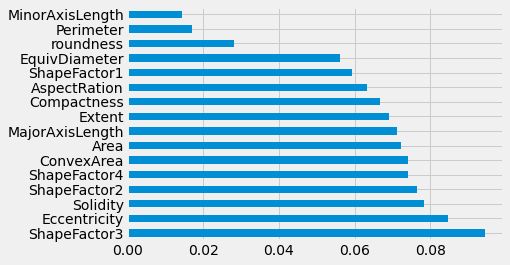

In [29]:
X_ = df_scaled.drop(columns = ['y'])
Y_ = df_scaled['y']

model = ExtraTreesClassifier()
model.fit(X_,Y_)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.show()


In [30]:
Y_

0           HOROZ
1           SEKER
2        DERMASON
3        DERMASON
4            SIRA
           ...   
10829       SEKER
10830    DERMASON
10831        CALI
10832        SIRA
10833    DERMASON
Name: y, Length: 10834, dtype: object

In [31]:
df_scaled.columns
['AspectRation','ShapeFactor1','ShapeFactor4','roundness','MinorAxisLength','Perimeter']

['AspectRation',
 'ShapeFactor1',
 'ShapeFactor4',
 'roundness',
 'MinorAxisLength',
 'Perimeter']

In [32]:
# features, train = featurewiz(df_scaled,'y', corr_limit= 0.5, sep=",",
# header=0,test_data="", feature_engg="", category_encoders="")

In [33]:
features

Index(['ID', 'Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')

In [34]:
# train
# ['AspectRation','ShapeFactor1','ShapeFactor2','ShapeFactor4','roundness','MinorAxisLength','Perimeter']

Class=4, n=2837 (14.286%)
Class=5, n=2837 (14.286%)
Class=3, n=2837 (14.286%)
Class=6, n=2837 (14.286%)
Class=0, n=2837 (14.286%)
Class=2, n=2837 (14.286%)
Class=1, n=2837 (14.286%)


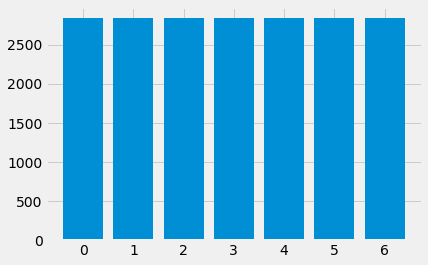

In [35]:
L = LabelEncoder()
Y_=L.fit_transform(Y_)
oversample = SMOTE(k_neighbors=7)
X, y= oversample.fit_resample(X_, Y_)
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
plt.bar(counter.keys(), counter.values())
plt.show()



In [36]:
df_final = pd.DataFrame(X,columns= df_copy.columns.difference(['ID','y']))
df_y = pd.DataFrame(y,columns = ['y'])
df_final = pd.concat([df_final, df_y], axis=1)
df_final.head(350)

,Area,AspectRation,Compactness,ConvexArea,Eccentricity,EquivDiameter,Extent,MajorAxisLength,MinorAxisLength,Perimeter,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Solidity,roundness,y
0,0.544777,0.653008,0.822611,-0.134810,2.125342,1.266132,0.541883,0.527444,-2.281944,-0.187074,-1.291886,-1.639088,0.128419,-0.764359,-1.525751,0.522756,4
1,-0.005210,-0.132903,-0.251184,0.518081,-1.146089,-1.844348,-0.014420,-0.005407,0.170410,1.320036,1.092843,1.343318,-0.490484,0.669985,1.427720,0.231459,5
2,-0.520329,-0.514704,-0.460767,-0.582377,-0.467863,-0.559845,-0.513866,-0.585815,0.606030,0.022075,0.568085,0.502230,0.676757,0.587736,0.515092,0.318841,3
3,-0.235136,-0.219625,-0.227884,-0.204482,-0.341812,-0.390431,-0.232756,-0.252418,0.088051,0.169199,0.251395,0.372117,0.202562,0.301592,0.379505,0.678516,3
4,-0.084764,-0.067434,-0.123724,0.017199,-0.353592,-0.405610,-0.083071,-0.088966,-0.445350,0.030919,0.065016,0.368808,-0.022484,0.210301,0.376076,0.026261,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,0.061519,0.209941,0.389207,-0.487051,1.649562,1.085448,0.067907,0.063256,-2.071517,-0.739194,-0.981086,-1.367965,0.585368,-0.561820,-1.289787,-1.188097,4
346,0.675711,0.695532,0.810854,0.262042,1.463655,1.003794,0.728167,0.644702,-1.566479,-5.291940,-0.999893,-1.334487,-0.151103,-0.702006,-1.260200,-5.570771,4
347,1.032723,1.010166,0.610668,1.223765,-0.089542,-0.093730,1.041643,0.949459,-0.639019,-1.519007,-1.298912,0.072785,-0.993567,-0.321150,0.073266,-0.776012,0
348,0.104843,0.087632,0.044372,0.183885,-0.158138,-0.169391,0.101488,0.107174,-1.000068,0.391445,0.060470,0.160355,-0.186230,0.018518,0.162036,-0.046906,6


In [37]:
# from sklearn.model_selection import cross_val_score,train_test_split

# df_train, df_val = train_test_split(df_scaled, test_size=0.2, random_state= 56, shuffle=True)

# X_train = df_train.drop(columns=df_scaled.columns.difference(['AspectRation','ShapeFactor1','ShapeFactor2','ShapeFactor4','roundness','MinorAxisLength','Perimeter']))
# y_train = df_train['y']

# X_val = df_val.drop(columns=df_scaled.columns.difference(['AspectRation','ShapeFactor1','ShapeFactor2','ShapeFactor4','roundness','MinorAxisLength','Perimeter']))
# y_val = df_val['y']

# print(X_train.shape,X_val.shape,y_train.shape,y_val.shape)


In [38]:
from sklearn.model_selection import cross_val_score,train_test_split
X_train, X_val, y_train, y_val= train_test_split(X,y,test_size=0.2,random_state=0,shuffle=True)

In [39]:
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the classifier
classifier = make_pipeline(PCA(n_components=13),DecisionTreeClassifier())

# Train the classifier
classifier = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf_model = make_pipeline(PCA(n_components=13, whiten=True),RandomForestClassifier(n_estimators = 200))
rf_model.fit(X_train, y_train)
rf_predict = rf_model.predict(X_val)

In [41]:
from sklearn.linear_model import LogisticRegression

lr_model = make_pipeline(PCA(n_components=9, whiten=True),LogisticRegression(max_iter=4000000,C=15,solver='sag'))
lr_model.fit(X_train, y_train)
lr_predict = lr_model.predict(X_val)

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = make_pipeline(PCA(n_components=13),GradientBoostingClassifier())
gb_model.fit(X_train, y_train)
gb_predict = gb_model.predict(X_val)

In [43]:
from sklearn.svm import SVC


svm_model = make_pipeline(PCA(n_components=13,whiten=True),SVC(C=20, gamma='scale', kernel= 'rbf',decision_function_shape='ovr',degree=7,tol=0.001 ))

# svm_model = SVC(C=12, gamma='scale', kernel= 'rbf',decision_function_shape='ovo',degree=2,tol=0.001 ) 0.9464697738809414
svm_model.fit(X_train, y_train)
svm_predict = svm_model.predict(X_val)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = make_pipeline(PCA(n_components=13),KNeighborsClassifier( n_neighbors= 56))
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_val)

In [45]:
from sklearn.neural_network import MLPClassifier

# mlp = MLPClassifier(hidden_layer_sizes=(100,10),activation='relu',solver='sgd',momentum=0.9,learning_rate_init=0.007)
mlp = make_pipeline(PCA(n_components=13),MLPClassifier())
mlp.fit(X_train, y_train)
mlp_predict = mlp.predict(X_val)





In [46]:
AdaBoostClassification = make_pipeline(PCA(n_components=13,whiten=True),
    AdaBoostClassifier(base_estimator = RandomForestClassifier(n_estimators = 40), n_estimators = 50, learning_rate = 0.01)
                   )
AdaBoostClassification.fit(X_train, y_train)
AdaBoostClassification_predict = AdaBoostClassification.predict(X_val)

In [47]:
from xgboost.sklearn import XGBClassifier

XGBoostClassififer = make_pipeline(
                    PCA(n_components=13,whiten=True),
                    xgb.XGBClassifier(n_estimators=200,learning_rate=0.07)
 )
XGBoostClassififer.fit(X_train, y_train)
XGB_predict = XGBoostClassififer.predict(X_val)

In [48]:
from sklearn.ensemble import VotingClassifier


voting_clf = VotingClassifier(estimators=[('SVC', svm_model),('XGB',XGBoostClassififer),('AdaBoostClassification',AdaBoostClassification),('GB',gb_model), ('MLP', mlp),('rand_forest',rf_model)],voting='hard')
#fit and predict using training and testing dataset respectively
voting_clf.fit(X_train, y_train)
voting_predict = voting_clf.predict(X_val)

In [49]:
# 1st way to calculate Accuracy 

from sklearn.metrics import accuracy_score ,f1_score ,recall_score ,precision_score

accuracy = accuracy_score(y_val, y_pred)
rf_accuracy = accuracy_score(y_val, rf_predict)
lr_accuracy = accuracy_score(y_val, lr_predict)
gb_accuracy = accuracy_score(y_val, gb_predict)
svm_accuracy = accuracy_score(y_val, svm_predict)
knn_acc = accuracy_score(y_val,knn_predict)
mlp_accuracy = accuracy_score(y_val,mlp_predict)
AdaBoostClassification_acc = accuracy_score(y_val,AdaBoostClassification_predict)
voting_accuracy = accuracy_score(y_val,voting_predict)
XGB_accuracy = accuracy_score(y_val, XGB_predict)

print ( 'Tree Accuracy = ' , accuracy)
print ( 'rf Accuracy = ' , rf_accuracy)
print ( 'Lr Accuracy = ' , lr_accuracy)
print ( 'GB Accuracy = ' , gb_accuracy)
print ( 'svm Accuracy = ' , svm_accuracy)
print ( 'knn Accuracy = ' , knn_acc)
print ( 'mlp Accuracy = ' , mlp_accuracy)
print ( 'AdaBoost Accuracy = ' , AdaBoostClassification_acc)
print ( 'XGB Accuracy = ' , XGB_accuracy)
print ( 'voting Accuracy = ' , voting_accuracy)



# {'activation': 'relu', 'hidden_layer_sizes': (100, 10), 'learning_rate_init': 0.007, 'momentum': 0.9, 'solver': 'sgd'}
# MLPClassifier(hidden_layer_sizes=(100,10),activation='relu',solver='sgd',momentum=0.7000000000000001,learning_rate_init=0.02)

# AdaBoost Accuracy =  0.959214501510574
# rf Accuracy =  0.9594662638469285
# voting Accuracy =  0.9574521651560927


Tree Accuracy =  0.9277442094662638
rf Accuracy =  0.9574521651560927
Lr Accuracy =  0.9410876132930514
GB Accuracy =  0.9458710976837865
svm Accuracy =  0.9531722054380665
knn Accuracy =  0.9373111782477341
mlp Accuracy =  0.9536757301107754
AdaBoost Accuracy =  0.9589627391742196
XGB Accuracy =  0.9546827794561934
voting Accuracy =  0.9574521651560927


# Accuracy with training data :

Tree Accuracy =  1.0
rf Accuracy =  1.0
Lr Accuracy =  0.9126572054920965
GB Accuracy =  0.9590400369216568
svm Accuracy =  0.9233875620168455

In [50]:
# # classifier = classifier.fit(X_train, y_train)
# # rf_model.fit(X_train, y_train)
# # lr_model.fit(X_train, y_train)
# # gb_model.fit(X_train, y_train)
# # svm_model.fit(X_train, y_train)

# y_pred_t = classifier.predict(X_train)
# rf_predict_t = rf_model.predict(X_train)
# lr_predict_t = lr_model.predict(X_train)
# gb_predict_t = gb_model.predict(X_train)
# svm_predict_t = svm_model.predict(X_train)


# accuracy_t = accuracy_score(y_train, y_pred_t)
# rf_accuracy_t = accuracy_score(y_train, rf_predict_t)
# lr_accuracy_t = accuracy_score(y_train, lr_predict_t)
# gb_accuracy_t = accuracy_score(y_train, gb_predict_t)
# svm_accuracy_t = accuracy_score(y_train, svm_predict_t)

# print ( 'train Tree Accuracy = ', accuracy_t)
# print ( 'train rf Accuracy = ', rf_accuracy_t)
# print ( 'train Lr Accuracy = ', lr_accuracy_t)
# print ( 'train GB Accuracy = ', gb_accuracy_t)
# print ( 'train svm Accuracy = ', svm_accuracy_t)

In [51]:
# from google.colab import drive
# drive.mount('/content/drive')

# USING PCA

In [52]:
# from sklearn.decomposition import PCA
# covar_matrix = PCA(n_components = 16)
# results = covar_matrix.fit(df_scaled.drop(columns=['y']))
# variance = results.explained_variance_ratio_
# variance.sum()


In [53]:
# var=np.cumsum(np.round(variance, decimals=3)*100)
# var

In [54]:


# plt.ylabel("variance")
# plt.xlabel("Num of features")
# plt.title("PCA Analysis")
# plt.ylim(70,101.0)
# plt.style.context('seaborn-whitegrid')
# plt.plot(var)

In [55]:
df2 = pd.read_csv('/content/test.csv')
print("The shape of the dataset is {}.\n\n".format(df2.shape))

The shape of the dataset is (2709, 17).




In [56]:
df2_test = df2.copy()
df2_test.head(3)

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889
1,10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956
2,10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607


In [57]:
# df2_scaled = scaler.fit_transform(df2_copy.drop(columns = ['ID']))
# df2_scaled = pd.DataFrame(df2_scaled , columns= df2_copy.columns.difference(['ID']))
# df2_scaled.describe().T

In [65]:
test = np.array(df2_test.drop(columns='ID'))
test

array([[5.76590000e+04, 9.55434000e+02, 3.87757607e+02, ...,
        9.88976854e-04, 4.88266100e-01, 9.62889464e-01],
       [2.87720000e+04, 6.30362000e+02, 2.29990785e+02, ...,
        2.36504137e-03, 6.92563018e-01, 9.97955922e-01],
       [5.46770000e+04, 9.11022000e+02, 3.08853903e+02, ...,
        1.85586078e-03, 7.29807979e-01, 9.95607182e-01],
       ...,
       [6.12260000e+04, 1.00837800e+03, 4.08227467e+02, ...,
        8.99972460e-04, 4.67779905e-01, 9.57747709e-01],
       [3.42380000e+04, 6.98847000e+02, 2.55829224e+02, ...,
        2.04483339e-03, 6.66067433e-01, 9.97263464e-01],
       [4.91750000e+04, 8.28597000e+02, 3.10354804e+02, ...,
        1.64501155e-03, 6.50036199e-01, 9.97096486e-01]])

In [66]:
y_test_predicted = voting_clf.predict(test)

In [67]:
y_test_predicted

array([1, 1, 1, ..., 1, 1, 1])

In [61]:
df2_test.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889
1,10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956
2,10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607
3,10837,24827,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.689009,0.998596
4,10838,141850,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.655462,0.991803


In [62]:
pred_labels = L.inverse_transform(y_test_predicted)
pred_labels

array(['BOMBAY', 'BOMBAY', 'BOMBAY', ..., 'BOMBAY', 'BOMBAY', 'BOMBAY'],
      dtype=object)

In [63]:
result = pd.DataFrame({'ID':df2_test.iloc[:,0], 'y':pred_labels})
result

,ID,y
0,10834,BOMBAY
1,10835,BOMBAY
2,10836,BOMBAY
3,10837,BOMBAY
4,10838,BOMBAY
...,...,...
2704,13538,BOMBAY
2705,13539,BOMBAY
2706,13540,BOMBAY
2707,13541,BOMBAY


In [64]:
# Tree Accuracy =  0.9327794561933535
# rf Accuracy =  0.9579556898288016
# Lr Accuracy =  0.9423464249748238
# GB Accuracy =  0.9504028197381672
# svm Accuracy =  0.9539274924471299
# knn Accuracy =  0.9375629405840886
# mlp Accuracy =  0.9561933534743202
# AdaBoost Accuracy =  0.9594662638469285
# voting Accuracy =  0.9587109768378651

In [64]:
result.to_csv('/content/adaboost_959.csv', index=False)